In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
import seaborn as sns

Hacemos los archivos para el bucket desbalanceado.

In [12]:
def char_range(a, b):
    for c in range(ord(a), ord(b)+1):
        yield chr(c)

def next(s):
    if s == '':
        return 'a'
    elif s[-1] != 'z':
        return s[:-1] + chr(ord(s[-1])+1)
    else:
        return next(s[:-1])+'a'

In [18]:
os.mkdir(f'../input/Kaggle/collisions')
os.mkdir(f'../input/Kaggle/collisions/100%')
os.mkdir(f'../input/Kaggle/collisions/different')
os.mkdir(f'../input/Kaggle/collisions/50_percent')

Creo dataset para equal

In [9]:
L = []

n = 10000
j = 0

c = 'a'
word = ''
for i in range(n):
    L += [c + word]
    word = next(word)

for i in char_range('a', 'p'):
    f = open(f'../input/synthetic/collisions/equal/{i}', 'w')
    for j in range(len(L)):
        f.write(L[j] + '\n')
    f.close()

Creo dataset para different

In [10]:
#Quiero agarrar todas las iniciales de forma que no colisionan los sets.
n = 10000
for c in char_range('a', 'p'):
    word = ''
    f = open(f'../input/synthetic/collisions/different/{c}', 'w')
    for i in range(n):
        f.write(c + word + '\n')
        word = next(word)
    f.close()

Creo DataSet para FiftyFifty

In [13]:
#Quiero agarrar todas las iniciales de forma que la mitad colisiona y la otra mitad no.
n = 25000
for c in char_range('a', chr(ord('a') + 15)):
    word = ''
    f = open(f'../input/synthetic/collisions/50_percent/{c}', 'w')
    for i in range(n):
        f.write(c + word + '\n')
        word = next(word)
    f.close()

for c in char_range('a', chr(ord('a') + 15)):
    word = ''
    f = open(f'../input/synthetic/collisions/50_percent/{c}', 'a')
    for i in range(n):
        f.write('q' + word + '\n')
        word = next(word)
    f.close()


AttributeError: module 'matplotlib.font_manager' has no attribute 'createFontList'

Gráficos

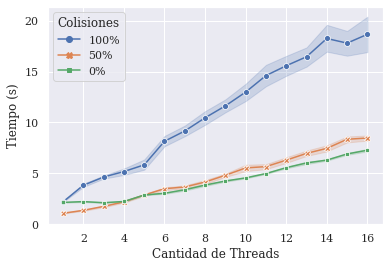

In [20]:
sns.set_theme(font = 'serif')
files = []
for i in range(1, 17):
    eq = pd.read_csv(f'../output/collisions/equal_{i}.csv')
    eq['Colisiones'] = '100%'
    files += [eq]

    fifty = pd.read_csv(f'../output/collisions/50_percent_{i}.csv')
    fifty['Colisiones'] = '50%'
    files += [fifty]

    diff = pd.read_csv(f'../output/collisions/different_{i}.csv')
    diff['Colisiones'] = '0%'
    files += [diff]

data = pd.concat(files, ignore_index = True)
ax = sns.lineplot(data = data, x = 'threads', y = 'tiempo', hue = 'Colisiones', style = 'Colisiones', markers = True, dashes = False)
ax.set(yticks = range(0, 21, 5), ylabel = range(0, 21, 5))
ax.set_xlabel('Cantidad de Threads')
ax.set_ylabel('Tiempo (s)')
plt.savefig('../figuras/colisiones.pdf', bbox_inches = 'tight')